# Introduction

Download and prepare the flowers data set for later use with PyTorch and TensorFlow.

# Setup

In [1]:
# This is a quick check of whether the notebook is currently running on Google Colaboratory, 
# as that makes some difference for the code below.
if 'google.colab' in str(get_ipython()):
    print('The notebook is running on Colab. colab=True.')
    colab=True
else:
    print('The notebook is not running on Colab. colab=False.')
    colab=False

The notebook is not running on Colab. colab=False.


In [2]:
# Set to True if you're using Paperspace Gradient:
gradient=False

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import os, shutil, random
from PIL import Image
from pathlib import Path
import urllib.request

In [4]:
if colab or gradient:
    !pip install -Uqq fastbook
    import fastbook
    fastbook.setup_book()
    from fastbook import *
    from fastcore.all import *
    NB_DIR = Path.cwd()

    
    if colab:
        DATADIR = Path('./gdrive/MyDrive/ColabData')
    elif gradient:
        DATADIR = Path('/storage')

else:
    from fastcore.all import *
    NB_DIR = Path.cwd()
    DATADIR = Path('/home/alex/data/dat255')  # Set this to where you want to store downloaded data
    
DATADIR.mkdir(exist_ok=True)

# Download and extract

In [5]:
url = 'https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz'

In [6]:
if not os.path.isfile(DATADIR/'flower_photos.tgz'):
    fn, _ = urllib.request.urlretrieve(url, DATADIR/'flower_photos.tgz')
    shutil.unpack_archive(fn, extract_dir=DATADIR)
    path = DATADIR/'flower_photos'
else:
    print(f"Already downloaded to {DATADIR}")
    fn = DATADIR/'flower_photos.tgz'
    path = DATADIR/'flower_photos'

Already downloaded to /home/alex/data/dat255


# Inspect

In [7]:
path.ls()

(#9) [Path('/home/alex/data/dat255/flower_photos/flowers_dataset_train.tfrecord'),Path('/home/alex/data/dat255/flower_photos/flowers_dataset_test.tfrecord'),Path('/home/alex/data/dat255/flower_photos/flowers_dataset.tfrecord'),Path('/home/alex/data/dat255/flower_photos/roses'),Path('/home/alex/data/dat255/flower_photos/LICENSE.txt'),Path('/home/alex/data/dat255/flower_photos/dandelion'),Path('/home/alex/data/dat255/flower_photos/tulips'),Path('/home/alex/data/dat255/flower_photos/sunflowers'),Path('/home/alex/data/dat255/flower_photos/daisy')]

In [8]:
imgs = L(path.glob('*/*.jpg'))

In [9]:
imgs

(#3670) [Path('/home/alex/data/dat255/flower_photos/roses/22093190909_77223e6f53_n.jpg'),Path('/home/alex/data/dat255/flower_photos/roses/15566697073_9a214b700e_n.jpg'),Path('/home/alex/data/dat255/flower_photos/roses/2973256732_1926295f35.jpg'),Path('/home/alex/data/dat255/flower_photos/roses/15965652160_de91389965_m.jpg'),Path('/home/alex/data/dat255/flower_photos/roses/4558025386_2c47314528.jpg'),Path('/home/alex/data/dat255/flower_photos/roses/3560426426_1c66cb8330.jpg'),Path('/home/alex/data/dat255/flower_photos/roses/3179751458_9646d839f6_n.jpg'),Path('/home/alex/data/dat255/flower_photos/roses/4231745228_ece86330d9.jpg'),Path('/home/alex/data/dat255/flower_photos/roses/9423755543_edb35141a3_n.jpg'),Path('/home/alex/data/dat255/flower_photos/roses/14597445311_8acb60247e.jpg')...]

Let's display some random images:

/home/alex/data/dat255/flower_photos/tulips/16303377824_6e9128b4bd.jpg
(500, 333)


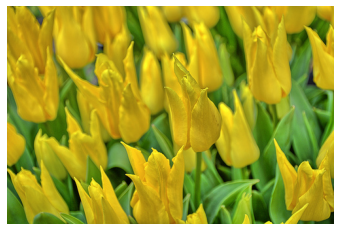

/home/alex/data/dat255/flower_photos/dandelion/2478018280_1be353ca8c_m.jpg
(240, 240)


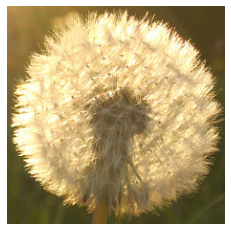

/home/alex/data/dat255/flower_photos/tulips/13510057763_01b832d919.jpg
(500, 333)


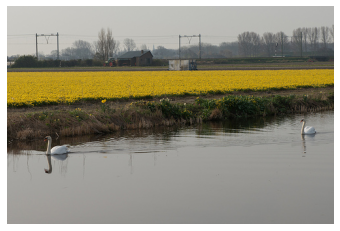

In [10]:
for img in random.choices(imgs, k=3):
    print(img)
    im = Image.open(img)
    print(im.size)
    plt.imshow(im)
    plt.axis('off')
    plt.show()

# Export path

Save the path to a file. To be loaded in later notebooks. 

In [11]:
import pickle

In [12]:
with open(DATADIR/'path.pkl', 'wb') as f:
    pickle.dump(path, f)